In [1]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import codecs

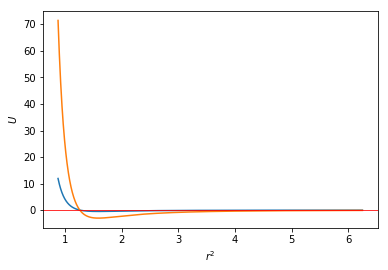

In [6]:
##Hago esto para ver que funciona

Datos = codecs.open("tabla_fz_pot.txt",'r','utf8').read().split('\n')

plt.figure()
ax=plt.subplot(111)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
r_2=[];
U=[];
f=[];

for j,data in enumerate(Datos[:-1]):
    data=[float(d) for d in data.split(' ')[:-1]]
    
    r_2.append(data[0])
    f.append(data[2]*data[0])
    U.append(data[1])

plt.plot(r_2[13990:],U[13990:])
plt.plot(r_2[13990:],f[13990:])

plt.axhline(0, color='red', alpha=0.8, linestyle='-',linewidth=1) #Para L=4
ax.set_xlabel(xlabel='$r^{2}$')
ax.set_ylabel(ylabel='$U$')
plt.show()
#print(type(r_2))
#print(len(r_2))


# Analizamos las energias

In [8]:
os.chdir("..")

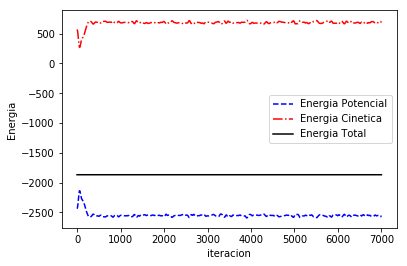

In [5]:
cwd=os.getcwd()

path= cwd+"/casero"; #si el directorio ya existe va a tirar error
os.chdir(path) #cambio de directorio

Datos = codecs.open("ej1_512_0.728000.txt",'r','utf8').read().split('\n')

plt.figure()
ax=plt.subplot(111)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
temp=[];
U=[];
K=[];
E=[];
pasos=list(range(0,7000));
for j,data in enumerate(Datos[:-1]):
    data=[float(d) for d in data.split(' ')[:-1]]
    
    temp.append(data[0])
    K.append(data[1])
    U.append(data[2])
    E.append(data[1]+data[2])

plt.plot(pasos,U,color='b', linestyle='--',label="Energia Potencial")
plt.plot(pasos,K,color='r',linestyle='-.',label="Energia Cinetica")
plt.plot(pasos,E, color='k',linestyle='-',label="Energia Total")


ax.set_xlabel(xlabel='iteracion')
ax.set_ylabel(ylabel='Energia')
plt.legend(loc=0)
plt.show()

os.chdir("..")

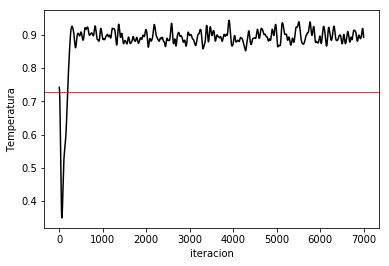

In [6]:
#Veamos la temperatura
plt.figure()
ax=plt.subplot(111)
plt.plot(pasos,temp,color='k', linestyle='-')


ax.set_xlabel(xlabel='iteracion')
ax.set_ylabel(ylabel='Temperatura')
plt.axhline(0.728, color='red', alpha=0.8, linestyle='-',linewidth=1) #Para L=4
plt.show()



# Termalizacion

In [12]:
#Para calcular los desordenamientos vamos a necesitar las posiciones, velocidades y las cosas que estan en el lammpsj
cwd=os.getcwd()

path= cwd+"/casero"; #si el directorio ya existe va a tirar error
os.chdir(path) #cambio de directorio
molecula=[]
x=[]
y=[]
z=[]
vx=[]
vy=[]
vz=[]
pasos=list(range(0,7000));
with open("T=0.728000_N=512.txt",'r') as data:
    #data=data.read()
   # for paso in pasos: [(paso*521)+9:(paso+1)*(512+9)]
    for j, myline in enumerate(data): # For each line, stored as myline,
        datos = [i.split() for i in myline.split('\n')];      
        datos = datos[0];
        if (len(datos)==7):
            x.append(float(datos[1]))
            y.append(float(datos[2]))
            z.append(float(datos[3]))
            vx.append(float(datos[4]))
            vy.append(float(datos[5]))
            vz.append(float(datos[6]))

os.chdir("..")






# Parametro de orden Verlet

In [24]:
Lx=[]
Ly=[]
Lz=[]
L=[]
a=8.4646/8;
iter=7000
N=512
pasos=list(range(0,iter));

for k in range(0,iter):
    lx=0;
    ly=0;
    lz=0;
    for i in range(0,N):
        lx = lx+ np.cos((2* np.pi)*(x[k*512+i]-a/2)/a);
        ly = ly+ np.cos((2* np.pi)*(y[k*512+i]-a/2)/a);
        lz = lz+ np.cos((2* np.pi)*(z[k*512+i]-a/2)/a);
    L.append((lx+ly+lz)/(3*N));


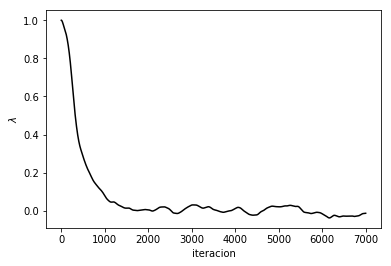

In [25]:
plt.figure()
ax=plt.subplot(111)
plt.plot(pasos,L,color='k', linestyle='-')


ax.set_xlabel(xlabel='iteracion')
ax.set_ylabel(ylabel=r'$\lambda$')
plt.show()

# Teorema H

In [13]:
#Hay que hacer un histograma de velocidades

H=[];
iter=7000
N=512
pasos=list(range(0,iter));

for k in range(0,iter):
    v_2=[];
    H_i=0;
    for i in range(0,N):
        v_2.append((vx[k*512+i])**2+(vy[k*512+i])**2+(vz[k*512+i])**2) 
    
    h=np.histogram(v_2)

    
  #  for i in range(0,N):
  #      H_i=H_i+h[i]*np.log(h[i]/v_2[i])

  #  H.append(H_i)

In [60]:
#h=np.histogram(v_2)
#print(h[0])
#print(h[1])


[149 147  91  54  27  26  11   2   4   1]
[0.0228031  1.01726021 2.01171733 3.00617444 4.00063156 4.99508867
 5.98954579 6.9840029  7.97846002 8.97291713 9.96737425]


(array([18., 13., 24., 28., 31., 16., 24., 27., 27., 13., 24., 17., 19.,
        22., 16., 15.,  8., 13., 11., 10., 14., 18.,  9., 13., 10.,  8.,
         3.,  2.,  1.,  4.,  4.,  4.,  3.,  4.,  5.,  4.,  1.,  1.,  2.,
         3.,  3.,  0.,  1.,  0.,  1.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([4.67336247e-03, 1.87166651e-01, 3.69659939e-01, 5.52153227e-01,
        7.34646515e-01, 9.17139803e-01, 1.09963309e+00, 1.28212638e+00,
        1.46461967e+00, 1.64711295e+00, 1.82960624e+00, 2.01209953e+00,
        2.19459282e+00, 2.37708611e+00, 2.55957940e+00, 2.74207268e+00,
        2.92456597e+00, 3.10705926e+00, 3.28955255e+00, 3.47204584e+00,
        3.65453912e+00, 3.83703241e+00, 4.01952570e+00, 4.20201899e+00,
        4.38451228e+00, 4.56700556e+00, 4.74949885e+00, 4.93199214e+00,
        5.11448543e+00, 5.29697872e+00

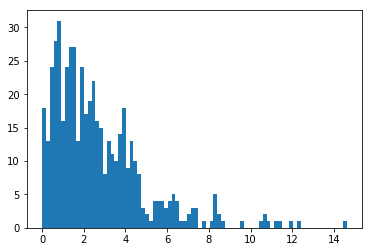

In [16]:
#histograma de las velocidades

plt.hist(v_2,bins=80)